# SMS Spam Detection using Machine Learning


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [3]:
df = pd.read_csv("dataset/spam.csv", encoding="latin-1")
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


# Data Preprocessing

In [4]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


# Train-Test Split

In [5]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Text Vectorization

In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [7]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [8]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



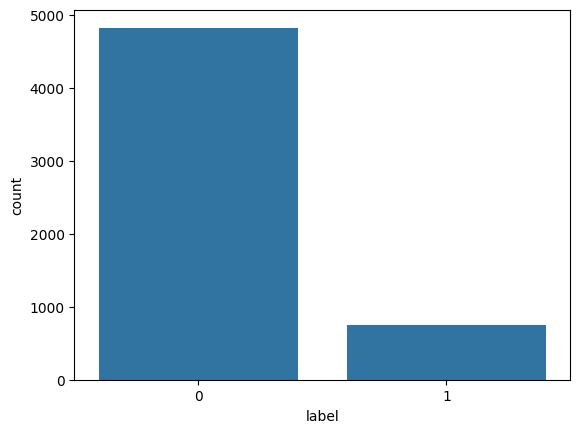

In [9]:
sns.countplot(x='label', data=df)
plt.show()


In [10]:
sample = ["Congrats! You won a free phone!"]
sample_vec = vectorizer.transform(sample)
print("Spam" if model.predict(sample_vec)[0] == 1 else "Ham")


Ham


# Conclusion
In this project, an SMS spam detection system was implemented using machine
learning techniques. TF-IDF was used for feature extraction and a Multinomial
Naive Bayes classifier was trained to classify messages as spam or ham.
The model achieved good accuracy and demonstrated effective text classification.
